In [1]:
""" Code taken from:
https://click.endnote.com/viewer?doi=10.1016%2Fj.cpc.2018.02.004&token=WzI1MTkzMTMsIjEwLjEwMTYvai5jcGMuMjAxOC4wMi4wMDQiXQ.Me0dEpnjbzi1YczwpCuoLJWfP9A
"""

## Import packages
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import math
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
font_size = 14


In [2]:
## Dimensional operators
cav_dim = 20 # types of photons there can exist (thermal or participaitn gin excitation)
atm_dim = 2 # energy levels in atom, 2 for TLS
I_cav = qeye(cav_dim) # identity matrix matching dimension of radiation field
I_atom = qeye(atm_dim) # identity matrix matching dimension of spin system

## Atomic spin system operators
sigmap = tensor(sigmap(), I_cav)
sigmam = tensor(sigmam(), I_cav)
sigmaz = tensor(sigmaz(), I_cav)

## Photon operators
adag = tensor(I_atom, create(cav_dim)) # order of arguments is important and is consistant with the spin operators                
a = tensor(I_atom, destroy(cav_dim))

## Physical constants
w = 2 * np.pi * 1.45e3 # cavity frequency with vacuum field energy set to zero (zero-point energy) (MHz)
g = 2 #2 * np.pi * 1.1 # test spin-photon couling strength ~ np.sqrt(tls_num)*g, experimetnally it's 1.1 though. 

## Initial quantum states
psi_atm = basis(2, 1) # atom initially stat in ground state
psi_phot_fock = fock(cav_dim, 1) # exactly 16 photons in the cavity out of a possible 40
psi_phot_fock2 = fock(cav_dim, 2)
psi_phot_fock3 = fock(cav_dim, 5)

psi_phot_coher = coherent(cav_dim, np.sqrt(1)) # exactly 16 photons in the cavity out of a possible 40
psi_phot_coher2 = coherent(cav_dim, np.sqrt(3))
psi_phot_coher3 = coherent(cav_dim, np.sqrt(10))



psi0_fock = tensor(psi_atm, psi_phot_fock)
psi0_fock2 = tensor(psi_atm, psi_phot_fock2)
psi0_fock3 = tensor(psi_atm, psi_phot_fock3)

psi0_coher = tensor(psi_atm, psi_phot_coher)
psi0_coher2 = tensor(psi_atm, psi_phot_coher2)
psi0_coher3 = tensor(psi_atm, psi_phot_coher3)



## Hamiltonian
H = g*(sigmap*a + sigmam*adag)

## Collapse operators
c_ops = []

Kc = 0.1
Ks = 0.05
gamma = 0.1

c_ops.append(np.sqrt(Kc) * a)
c_ops.append(np.sqrt(Ks) * sigmaz)
c_ops.append(np.sqrt(gamma) * sigmam)

## simulation duration and master equation solver
time = 20
steps = 2000
tlist = np.linspace(0, time, steps)
result_fock = mesolve(H, psi0_fock, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))
result_fock2 = mesolve(H, psi0_fock2, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))
result_fock3 = mesolve(H, psi0_fock3, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))


result_coher = mesolve(H, psi0_coher, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))
result_coher2 = mesolve(H, psi0_coher2, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))
result_coher3 = mesolve(H, psi0_coher3, tlist, c_ops, [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))



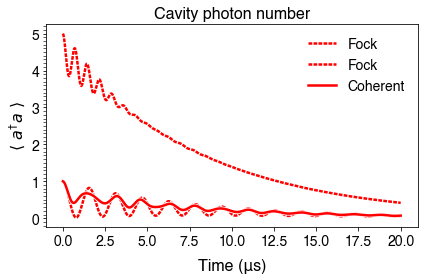

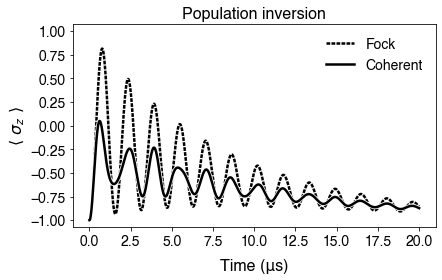

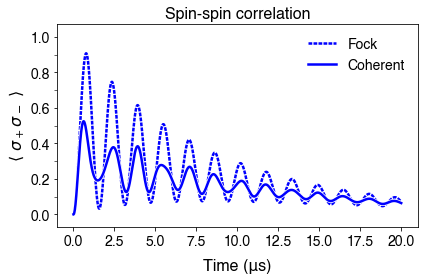

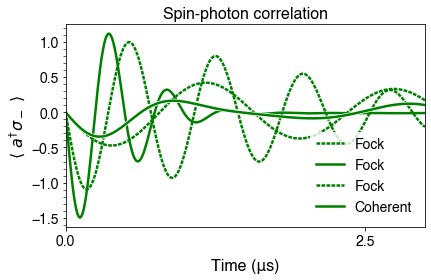

In [3]:
## Visualization

fig, ax = plt.subplots(figsize=(6,4))
plt.figure(1)
plt.plot(tlist, result_fock.expect[0], color='r', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_fock3.expect[0], color='r', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_coher.expect[0], color='r', linestyle='-', path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()], linewidth=2.5, zorder=0, label='Coherent')
#plt.ylim([-0.07, 1.07])
plt.title('Cavity photon number', fontsize = 16)
plt.ylabel(r'$\langle\ a^\dag a \ \rangle$', fontsize = 16)
plt.xlabel('Time (μs)', labelpad = 10, fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', length=3)
plt.legend(fancybox=False, edgecolor='w', fontsize=14)
plt.tight_layout()
plt.savefig('adag a.png', format = 'png', dpi = 900) 


fig, ax = plt.subplots(figsize=(6.25,4))
plt.figure(2)
plt.plot(tlist, result_fock.expect[1], color='k', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_coher.expect[1], color='k', linestyle='-', path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()], linewidth=2.5, zorder=0, label='Coherent')
plt.ylim([-1.07, 1.07])
plt.title('Population inversion', fontsize = 16)
plt.ylabel(r'$\langle\ \sigma_z \ \rangle$', fontsize = 16)
plt.xlabel('Time (μs)', labelpad = 10, fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', length=3)
plt.legend(fancybox=False, edgecolor='w', fontsize=14)
plt.tight_layout()
plt.savefig('sigmaz.png', format = 'png', dpi = 900) 


fig, ax = plt.subplots(figsize=(6,4))
plt.figure(3)
plt.plot(tlist, result_fock.expect[2], color='b', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_coher.expect[2], color='b', linestyle='-', path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()], linewidth=2.5, zorder=0, label='Coherent')
plt.ylim([-0.07, 1.07])
plt.title('Spin-spin correlation', fontsize = 16)
plt.ylabel(r'$\langle\ \sigma_+ \sigma_- \ \rangle$', fontsize = 16)
plt.xlabel('Time (μs)', labelpad = 10, fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', length=3)
plt.legend(fancybox=False, edgecolor='w', fontsize=14)
plt.tight_layout()
plt.savefig('sigmap sigmam.png', format = 'png', dpi = 900) 


fig, ax = plt.subplots(figsize=(6.1,4))
plt.figure(4)
plt.plot(tlist, result_fock3.expect[3].imag, color='g', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_coher3.expect[3].imag, color='g', linestyle='-', linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_fock.expect[3].imag, color='g', linestyle='--', dashes=(1.5, 0.5), linewidth=2.5, zorder=0, label='Fock')
plt.plot(tlist, result_coher.expect[3].imag, color='g', linestyle='-', path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()], linewidth=2.5, zorder=0, label='Coherent')
#plt.ylim([-0.57, 0.57])
plt.xlim([0, 3])
plt.title('Spin-photon correlation', fontsize = 16)
plt.ylabel(r'$\langle\ a^\dag \sigma_- \ \rangle$', fontsize = 16)
plt.xlabel('Time (μs)', labelpad = 10, fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', length=3)
plt.legend(fancybox=False, edgecolor='w', fontsize=14)
plt.tight_layout()
plt.savefig('adag sigmam.png', format = 'png', dpi = 900)  

plt.show()




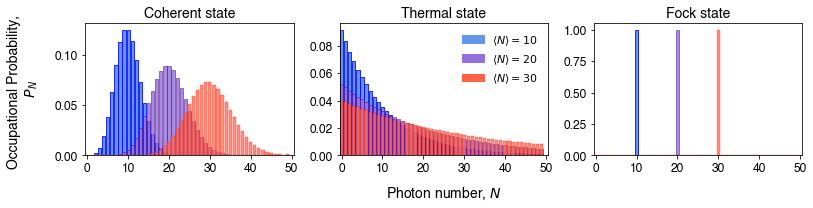

In [4]:
N = 50
rho_coherent1 = coherent_dm(N, np.sqrt(10))
rho_coherent2 = coherent_dm(N, np.sqrt(20))
rho_coherent3 = coherent_dm(N, np.sqrt(30))
rho_thermal1 = thermal_dm(N, 10)
rho_thermal2 = thermal_dm(N, 20)
rho_thermal3 = thermal_dm(N, 30)
rho_fock1 = fock_dm(N, 10)
rho_fock2 = fock_dm(N, 20)
rho_fock3 = fock_dm(N, 30)
fig, axes = plt.subplots(1, 3, figsize=(11.5,3))
axes[0].bar(np.arange(0, N), rho_coherent1.diag(), color='cornflowerblue', linewidth=0.8, edgecolor='blue', alpha=1)
axes[0].bar(np.arange(0, N), rho_coherent2.diag(), color='mediumpurple', linewidth=0.6, edgecolor='indigo', alpha=0.8)
axes[0].bar(np.arange(0, N), rho_coherent3.diag(), color='tomato', linewidth=0.4, edgecolor='red', alpha=0.7)
axes[0].set_title("Coherent state", fontsize=14)
axes[0].set_xlim([-.5, N+0.5])
axes[0].set_ylabel('Occupational Probability, \n $P_N$', labelpad = 15, fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].set_xticks(np.arange(0, N+1, 10))
axes[1].bar(np.arange(0, N), rho_thermal1.diag(), color='cornflowerblue', linewidth=0.8, edgecolor='blue', alpha=1)
axes[1].bar(np.arange(0, N), rho_thermal2.diag(), color='mediumpurple', linewidth=0.6, edgecolor='indigo', alpha=0.8)
axes[1].bar(np.arange(0, N), rho_thermal3.diag(), color='tomato', linewidth=0.4, edgecolor='red', alpha=0.7)
axes[1].set_title("Thermal state", fontsize=14)
axes[1].set_xlim([-.5, N+0.5])
axes[1].set_xlabel('Photon number, $N$', labelpad = 10, fontsize=14)
axes[1].set_xticks(np.arange(0, N+1, 10))
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[2].bar(np.arange(0, N), rho_fock1.diag(), color='cornflowerblue', linewidth=0.8, edgecolor='blue', alpha=1)
axes[2].bar(np.arange(0, N), rho_fock2.diag(), color='mediumpurple', linewidth=0.6, edgecolor='indigo', alpha=0.8)
axes[2].bar(np.arange(0, N), rho_fock3.diag(), color='tomato', linewidth=0.4, edgecolor='red', alpha=0.7)
axes[2].set_title("Fock state", fontsize=14)
axes[2].set_xlim([-.5, N+0.5])
axes[2].set_xticks(np.arange(0, N+1, 10))
axes[2].tick_params(axis='both', which='major', labelsize=12)

colors = {r'$\langle N \rangle = 10$':'cornflowerblue', r'$\langle N \rangle = 20$':'mediumpurple', r'$\langle N \rangle = 30$':'tomato'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
axes[1].legend(handles, labels, frameon=False, loc='upper right', fontsize=11)


plt.tight_layout()
plt.savefig('light.png', format = 'png', dpi = 900) 

plt.show()




In [5]:
coherent(3, np.sqrt(1))

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.61314782]
 [0.5698601 ]
 [0.5470916 ]]

In [6]:
coherent(2, 1)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.54030231]
 [0.84147098]]

In [7]:
q = rho0 * tensor(qeye(2), destroy(2)) * tensor(sigmam(), qeye(2))
q

NameError: name 'rho0' is not defined

In [ ]:
psi_atm = np.sqrt(0.2)*basis(2, 0) + np.sqrt(0.8)*basis(2, 1)
rho_atm = ket2dm(psi_atm)
psi_phot = np.sqrt(0.2)*fock(2, 0) + np.sqrt(0.8)*fock(2, 1)
rho_phot = ket2dm(psi_phot)
rho0 = tensor(rho_atm, rho_phot)
rho0

In [ ]:
basis(2,0) * basis(2,1).dag()

In [ ]:
sigmap()

In [ ]:
np.sqrt(0.6)*basis(2,1) + np.sqrt(0.4)*basis(2,0)

In [ ]:
## http://qutip.org/docs/4.1/guide/guide-visualization.html